In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd



Data = pd.read_csv('/content/drive/MyDrive/netflix data/combined_data_1.txt.zip', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])



In [22]:
Data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [24]:
movie_count=Data['Rating'].isnull().sum()


In [25]:
movie_count

4499

In [26]:
cust_no=Data['Cust_Id'].nunique()
cust_no=cust_no-movie_count
cust_no

470758

In [27]:
Total_rating=Data['Cust_Id'].count()-movie_count
Total_rating

24053764

In [28]:
star_counts = Data['Rating'].value_counts().sort_index()
star_counts=pd.DataFrame({'rating':[1,2,3,4,5],'count':star_counts.values})
star_counts.set_index('rating',inplace=True)
star_counts

,count
rating,
1,1118186
2,2439073
3,6904181
4,8085741
5,5506583


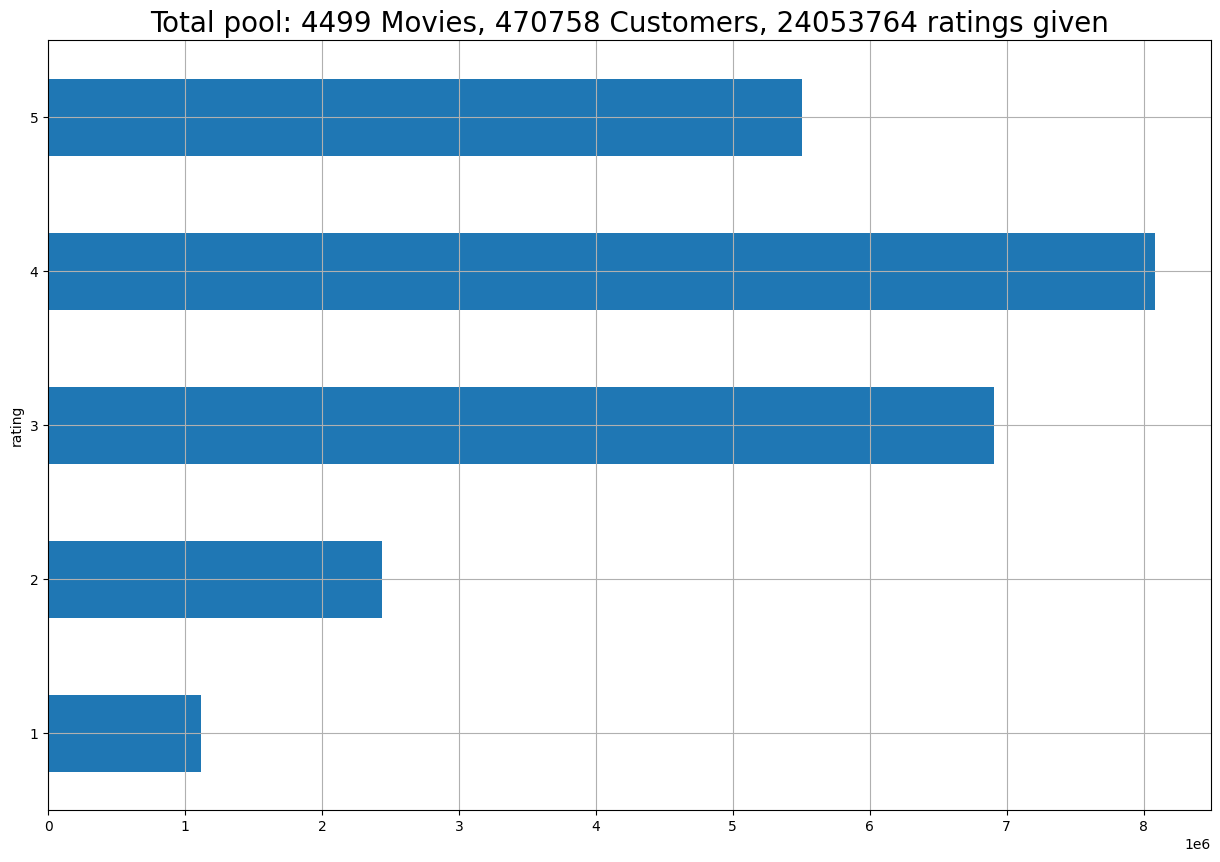

In [29]:
ax=star_counts.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_no} Customers, {Total_rating} ratings given', fontsize=20)
plt.grid(True)


In [30]:
df_nan=pd.DataFrame(pd.isnull(Data['Rating']))

In [31]:
df_nan.head

<bound method NDFrame.head of           Rating
0           True
1          False
2          False
3          False
4          False
...          ...
24058258   False
24058259   False
24058260   False
24058261   False
24058262   False

[24058263 rows x 1 columns]>

In [32]:
import pandas as pd

# Assuming your DataFrame is named 'df'
Data['movie_count'] = Data['Rating'].isnull().cumsum()

# Drop rows with NaN in the 'Rating' column
Data = Data.dropna(subset=['Rating'])

# Display the resulting DataFrame
Data

,Cust_Id,Rating,movie_count
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [33]:
Data.tail()

,Cust_Id,Rating,movie_count
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [34]:
np.round(Data['movie_count'].describe())

count    24053764.0
mean         2308.0
std          1304.0
min             1.0
25%          1180.0
50%          2342.0
75%          3433.0
max          4499.0
Name: movie_count, dtype: float64

In [35]:

movie_ratings_count = Data.groupby('movie_count')['Cust_Id'].agg(['count'])

movie_ratings_count


,count
movie_count,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [36]:
movie_ratings_count['count'].describe()

count      4499.000000
mean       5346.468993
std       16176.313851
min          36.000000
25%         192.000000
50%         552.000000
75%        2538.000000
max      193941.000000
Name: count, dtype: float64

In [37]:
movie_ratings_count["count"].quantile(0.70)

1798.6

In [38]:
filtered_movie_ratings_count = movie_ratings_count[movie_ratings_count["count"] >= 1798.6]
filtered_movie_ratings_count

,count
movie_count,
3,2012
8,14910
16,2699
17,7108
18,10722
...,...
4488,33175
4490,10258
4492,9353


In [39]:
filtered_movie_ratings_count=filtered_movie_ratings_count.reset_index()
filtered_movie_ratings_count

,movie_count,count
0,3,2012
1,8,14910
2,16,2699
3,17,7108
4,18,10722
...,...,...
1345,4488,33175
1346,4490,10258
1347,4492,9353
1348,4493,6381


In [40]:
users_count = Data.groupby('Cust_Id')['movie_count'].agg(['count'])
users_count


,count
Cust_Id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [41]:
users_count['count'].quantile(0.7)

52.0

In [42]:
active_users = users_count[users_count["count"] >= 52.0]


active_users = active_users.reset_index()
active_users

,Cust_Id,count
0,1000033,101
1,1000062,160
2,1000079,229
3,1000084,110
4,1000095,146
...,...,...
143453,999901,111
143454,999903,77
143455,999913,53
143456,99993,139


In [43]:
filtered_data=Data[Data['movie_count'].isin(filtered_movie_ratings_count['movie_count'])]
filtered_data

,Cust_Id,Rating,movie_count
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [44]:
filtered_data = Data[Data['Cust_Id'].isin(active_users['Cust_Id'])]
filtered_data

,Cust_Id,Rating,movie_count
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
...,...,...,...
24058256,1796454,1.0,4499
24058258,2591364,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [60]:
Data=filtered_data
Data.tail()

,Cust_Id,Rating,movie_count
24058256,1796454,1.0,4499
24058258,2591364,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [46]:
np.round(filtered_data.describe())

,Rating,movie_count
count,18454563.0,18454563.0
mean,4.0,2302.0
std,1.0,1303.0
min,1.0,1.0
25%,3.0,1175.0
50%,4.0,2340.0
75%,4.0,3433.0
max,5.0,4499.0


es


In [50]:
df_title = pd.read_csv("/content/drive/MyDrive/netflix data/movie_titles.csv",encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [49]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163688 sha256=8a080e5f8d863606701b4de32e0c740fa636a28072d7b274b9cc4917e4a34abc
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [51]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [52]:
reader=Reader()

In [53]:
model=SVD()

In [61]:
# prompt: change the name of the column movie_count in the data set Data to Movie_Id

Data.rename(columns={'movie_count': 'Movie_Id'}, inplace=True)


<ipython-input-61-45d00b366a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.rename(columns={'movie_count': 'Movie_Id'}, inplace=True)


In [63]:
data=Dataset.load_from_df(Data[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [62]:
Data

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
...,...,...,...
24058256,1796454,1.0,4499
24058258,2591364,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [65]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.01300325, 1.01364309, 1.01239097, 1.00168633]),
 'test_mae': array([0.81202918, 0.81055302, 0.81392182, 0.80500934]),
 'fit_time': (4.3723015785217285,
  1.6825010776519775,
  1.708634614944458,
  1.707885503768921),
 'test_time': (0.14907383918762207,
  0.15055465698242188,
  0.31870365142822266,
  0.14056634902954102)}

In [69]:
dataset_512536	=Data[(Data['Cust_Id'] ==512536	)& (Data['Rating']==5)]

dataset_512536

,Cust_Id,Rating,Movie_Id


In [71]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [72]:
user_512536=df_title.copy()
user_512536

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [73]:
user_512536=user_512536.reset_index()
user_512536

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [74]:
user_512536['Estimate_Score']=user_512536['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [75]:
user_512536

,Movie_Id,Year,Name,Estimate_Score
0,1,2003.0,Dinosaur Planet,3.759948
1,2,2004.0,Isle of Man TT 2004 Review,3.379859
2,3,1997.0,Character,3.672963
3,4,1994.0,Paula Abdul's Get Up & Dance,2.605312
4,5,2004.0,The Rise and Fall of ECW,3.909773
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.578520
17766,17767,2004.0,Fidel Castro: American Experience,3.578520
17767,17768,2000.0,Epoch,3.578520
17768,17769,2003.0,The Company,3.578520


In [77]:
user_512536=user_512536.sort_values('Estimate_Score',ascending=False)
user_512536

,Movie_Id,Year,Name,Estimate_Score
12,13,2003.0,Lord of the Rings: The Return of the King: Ext...,4.592416
4,5,2004.0,The Rise and Fall of ECW,3.909773
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.888775
27,28,2002.0,Lilo and Stitch,3.828755
0,1,2003.0,Dinosaur Planet,3.759948
...,...,...,...,...
13,14,1982.0,Nature: Antarctica,2.844706
25,26,2004.0,Never Die Alone,2.752933
3,4,1994.0,Paula Abdul's Get Up & Dance,2.605312
6,7,1992.0,8 Man,2.330530
